<a href="https://colab.research.google.com/github/Ishu2311/prognosAI_project/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - 1
# 1. Load and Inspect the CMAPSS Dataset
Task:

Write Python code to load the raw train_FD001.txt dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
Expected Output: DataFrame shape, info, and sample rows.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
## Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler

In [ ]:
## Load the dataset
column_names = [
    "engine_id", "cycle",
    "op_setting_1", "op_setting_2", "op_setting_3"
]+[f"sensor_{i}" for i in range(1,22)]

df = pd.read_csv(
    '/content/drive/MyDrive/Dataset of ai/train_FD001.txt',
    sep='\s+',
    header=None,
    names=column_names
)
# Display first 5 rows
df.head(5)

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1637433385.py:9: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     20631 non-nu

In [ ]:
df.dtypes

,0
engine_id,int64
cycle,int64
op_setting_1,float64
op_setting_2,float64
op_setting_3,float64
sensor_1,float64
sensor_2,float64
sensor_3,float64
sensor_4,float64
sensor_5,float64


In [ ]:
# Shape of the Dataframe
df.shape

(20631, 26)

In [ ]:
# Engine and Cycle range
print("Unique engines:", df['engine_id'].nunique())
print("Cycle range: {} - {}".format(df['cycle'].min(), df['cycle'].max()))

Unique engines: 100
Cycle range: 1 - 362


## 2. Visualize Sensor Distributions and Identify Missing Values
Task:

Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
Expected Output: Three histogram plots and a summary/report on missing values per column.

In [ ]:
## Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset of ai/cmapss_cleaned_train_FD001.csv')
df.head()

,engine_id,cycle,op_setting_1,op_setting_2,op_settings_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


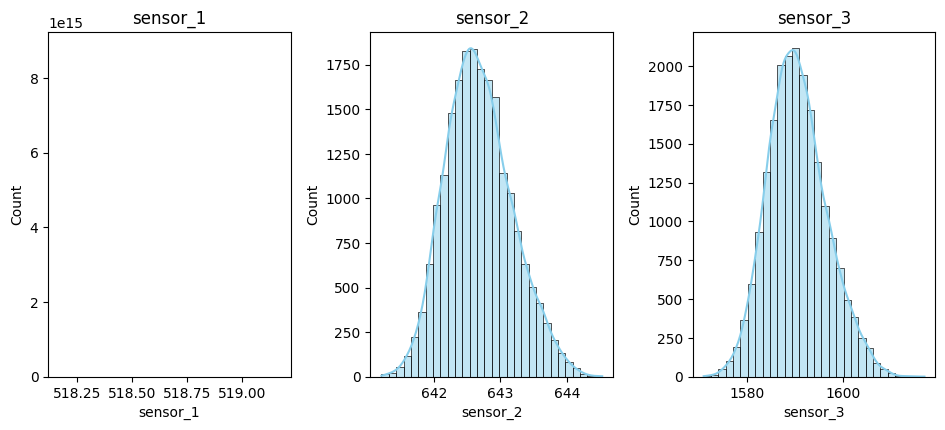

In [ ]:
# Sensor example distributions
sensor_cols = [col for col in df.columns if "sensor_" in col]
plt.figure(figsize=(16,8))
for i, col in enumerate(sensor_cols[:3], 1):   # Show first 10 sensors for brevity
    plt.subplot(2, 5, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Check missing values for all columns
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Values']
missing_summary['% Missing'] = (missing_summary['Missing Values'] / len(df)) * 100

print(missing_summary.head(20))

           Column  Missing Values  % Missing
0       engine_id               0        0.0
1           cycle               0        0.0
2    op_setting_1               0        0.0
3    op_setting_2               0        0.0
4   op_settings_3               0        0.0
5        sensor_1               0        0.0
6        sensor_2               0        0.0
7        sensor_3               0        0.0
8        sensor_4               0        0.0
9        sensor_5               0        0.0
10       sensor_6               0        0.0
11       sensor_7               0        0.0
12       sensor_8               0        0.0
13       sensor_9               0        0.0
14      sensor_10               0        0.0
15      sensor_11               0        0.0
16      sensor_12               0        0.0
17      sensor_13               0        0.0
18      sensor_14               0        0.0
19      sensor_15               0        0.0


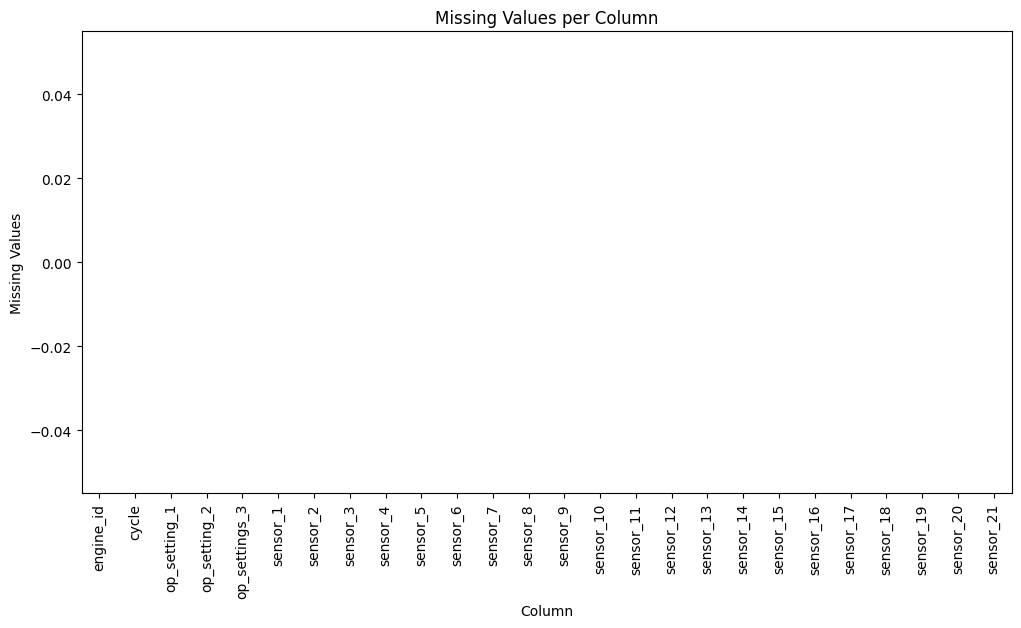

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Column", y="Missing Values", data=missing_summary)
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.show()

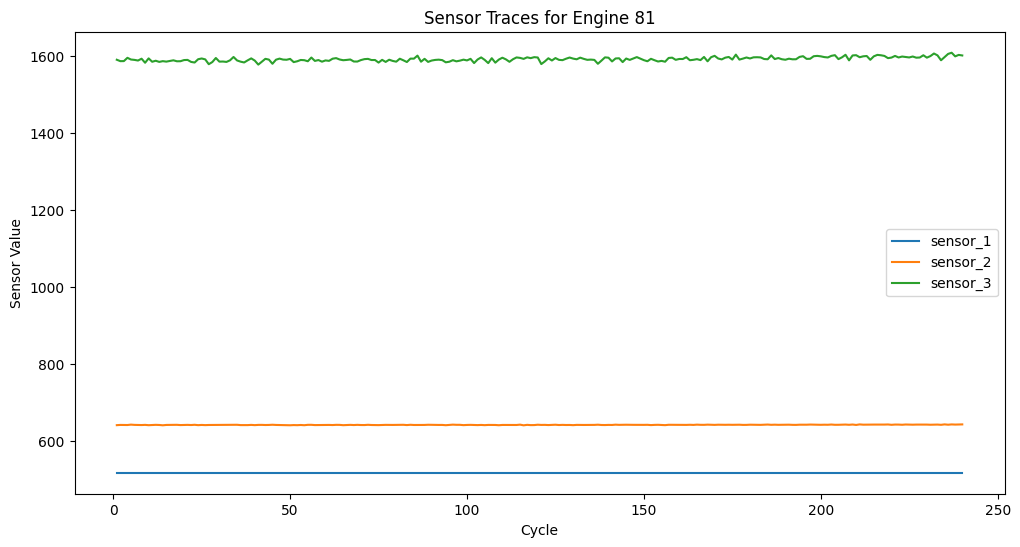

In [ ]:
## Visualize a random engine's sensor history
engine_id = np.random.choice(df['engine_id'].unique())
sample = df[df['engine_id'] == engine_id]
plt.figure(figsize=(12, 6))
for col in sensor_cols[:3]:
  plt.plot(sample['cycle'], sample[col],label=col)
plt.title(f'Sensor Traces for Engine {engine_id}')
plt.xlabel('Cycle')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

## 3. Feature Engineering – Aggregation and Rolling Statistics
Task:

For a selected sensor (e.g., sensor_2), compute and append to the DataFrame:
The mean and standard deviation of sensor_2 by each engine_id

The rolling mean (window size=5) for each engine’s sensor_2 readings

Expected Output: Show a few sample rows with these new features.

In [ ]:
sensor_col = "sensor_2"


In [ ]:
# Engine-wise aggregate feature (static for each engine of sensor 2)
engine_aggs = df.groupby('engine_id')[sensor_col].agg(['mean', 'std', 'min', 'max'])
engine_aggs.columns = [f"{sensor_col}_{stat}" for stat in engine_aggs.columns]
engine_aggs.reset_index(inplace=True)
print("Aggregate feature matrix shape: {engine_aggs.shape}")
engine_aggs.head()

Aggregate feature matrix shape: {engine_aggs.shape}


,engine_id,sensor_2_mean,sensor_2_std,sensor_2_min,sensor_2_max
0,1,642.621042,0.486795,641.71,644.21
1,2,642.435226,0.560214,641.27,643.94
2,3,642.543743,0.474190,641.48,643.93
3,4,642.662381,0.441446,641.81,644.53
4,5,642.451970,0.551542,641.30,644.02


In [ ]:

# Add rolling mean and std (window=5 cycles) for sensor_2 per engine
df[f"{sensor_col}_rollmean5"] = (
    df.groupby("engine_id")[sensor_col]
      .rolling(window=5, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)

df[f"{sensor_col}_rollstd5"] = (
    df.groupby("engine_id")[sensor_col]
      .rolling(window=5, min_periods=1)
      .std()
      .reset_index(level=0, drop=True)
)

# Columns to display
cols_to_show = [sensor_col, f"{sensor_col}_rollmean5", f"{sensor_col}_rollstd5"]

# Show first 10 rows
df[["engine_id", "cycle"] + cols_to_show].head(10)


,engine_id,cycle,sensor_2,sensor_2_rollmean5,sensor_2_rollstd5
0,1,1,641.82,641.820000,NaN
1,1,2,642.15,641.985000,0.233345
2,1,3,642.35,642.106667,0.267644
3,1,4,642.35,642.167500,0.250117
4,1,5,642.37,642.208000,0.234776
5,1,6,642.10,642.264000,0.128374
6,1,7,642.48,642.330000,0.139463
7,1,8,642.56,642.372000,0.174270
8,1,9,642.12,642.326000,0.208519
9,1,10,641.71,642.194000,0.340705


In [ ]:
# Merge engine-level aggregates back to main df
df = df.merge(engine_aggs, on="engine_id", how="left")

# Columns to display for expected output
sample_cols = [
    "engine_id", "cycle", "sensor_2",
    "sensor_2_mean", "sensor_2_std",   # engine-level stats
    "sensor_2_rollmean5", "sensor_2_rollstd5"  # rolling stats
]

# Show first 10 rows
df[sample_cols].head(10)

,engine_id,cycle,sensor_2,sensor_2_mean,sensor_2_std,sensor_2_rollmean5,sensor_2_rollstd5
0,1,1,641.82,642.621042,0.486795,641.820000,NaN
1,1,2,642.15,642.621042,0.486795,641.985000,0.233345
2,1,3,642.35,642.621042,0.486795,642.106667,0.267644
3,1,4,642.35,642.621042,0.486795,642.167500,0.250117
4,1,5,642.37,642.621042,0.486795,642.208000,0.234776
5,1,6,642.10,642.621042,0.486795,642.264000,0.128374
6,1,7,642.48,642.621042,0.486795,642.330000,0.139463
7,1,8,642.56,642.621042,0.486795,642.372000,0.174270
8,1,9,642.12,642.621042,0.486795,642.326000,0.208519
9,1,10,641.71,642.621042,0.486795,642.194000,0.340705


## 4. Data Normalization
Task:

Normalize all sensor columns in the DataFrame using StandardScaler from scikit-learn (zero mean, unit variance) and create a new DataFrame, maintaining the original engine_id and cycle columns.
Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only sensor columns
sensor_cols = [col for col in df.columns if "sensor_" in col]

# Initialize scaler
scaler = StandardScaler()

# Copy df to keep engine_id and cycle unchanged
df_scaled = df.copy()

# Scale sensor columns
df_scaled[sensor_cols] = scaler.fit_transform(df[sensor_cols])

#Expected Output 1: show head of normalized DataFrame
print("Head of normalized DataFrame:")
df_scaled[["engine_id", "cycle"] + sensor_cols].head()
df_scaled.head()

Head of normalized DataFrame:


,engine_id,cycle,op_setting_1,op_setting_2,op_settings_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_2_rollmean5,sensor_2_rollstd5,sensor_2_mean,sensor_2_std,sensor_2_min,sensor_2_max
0,1,1,-0.0007,-0.0004,100.0,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,...,0.0,0.0,1.348493,1.194427,-2.067769,NaN,-0.33115,0.458497,0.265208,0.702549
1,1,2,0.0019,-0.0003,100.0,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,...,0.0,0.0,1.016528,1.236922,-1.665516,-0.489727,-0.33115,0.458497,0.265208,0.702549
2,1,3,-0.0043,0.0003,100.0,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15,...,0.0,0.0,0.739891,0.503423,-1.368905,-0.159853,-0.33115,0.458497,0.265208,0.702549
3,1,4,0.0007,0.0000,100.0,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15,...,0.0,0.0,0.352598,0.777792,-1.220599,-0.328425,-0.33115,0.458497,0.265208,0.702549
4,1,5,-0.0019,-0.0002,100.0,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15,...,0.0,0.0,0.463253,1.059552,-1.121865,-0.475962,-0.33115,0.458497,0.265208,0.702549


In [ ]:
#Expected Output 2: check distribution after scaling
check_stats = df_scaled[sensor_cols].describe().T[["mean", "std"]]
print("\nCheck scaled feature distribution (means ≈ 0, std ≈ 1):")
print(check_stats)


Check scaled feature distribution (means ≈ 0, std ≈ 1):
                            mean       std
sensor_1            0.000000e+00  0.000000
sensor_2            6.410348e-14  1.000024
sensor_3           -4.959437e-14  1.000024
sensor_4            9.285169e-16  1.000024
sensor_5           -1.776357e-15  0.000000
sensor_6           -6.469426e-12  1.000024
sensor_7           -3.161641e-14  1.000024
sensor_8            1.008249e-12  1.000024
sensor_9           -4.185765e-14  1.000024
sensor_10           0.000000e+00  0.000000
sensor_11          -2.937089e-15  1.000024
sensor_12          -1.199702e-13  1.000024
sensor_13           3.493855e-13  1.000024
sensor_14           3.061075e-15  1.000024
sensor_15          -3.244023e-14  1.000024
sensor_16          -1.387779e-17  0.000000
sensor_17           1.666922e-14  1.000024
sensor_18           0.000000e+00  0.000000
sensor_19           0.000000e+00  0.000000
sensor_20           4.156146e-14  1.000024
sensor_21           2.402296e-14  1.0000

## 5. Rolling Window Sequence Generation
Task:

Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
Expected Output: Array shape, example content, and confirmation of successful file saves.

In [ ]:
# Import necessary modules
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset of ai/cmapss_feature_engineered_FD0010.csv')
df.head()

,engine_id,cycle,op_setting_1,op_setting_2,op_settings_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_17_rollmean5,sensor_17_rollstd5,sensor_18_rollmean5,sensor_18_rollstd5,sensor_19_rollmean5,sensor_19_rollstd5,sensor_20_rollmean5,sensor_20_rollstd5,sensor_21_rollmean5,sensor_21_rollstd5
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392.000000,NaN,2388.0,NaN,100.0,NaN,39.060000,NaN,23.419000,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392.000000,0.000000,2388.0,0.0,100.0,0.0,39.030000,0.042426,23.421300,0.003253
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,391.333333,1.154701,2388.0,0.0,100.0,0.0,39.003333,0.055076,23.395600,0.044573
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,391.500000,1.000000,2388.0,0.0,100.0,0.0,38.972500,0.076322,23.390175,0.037977
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,391.800000,1.095445,2388.0,0.0,100.0,0.0,38.958000,0.073621,23.393020,0.033498


In [ ]:
exclude_cols = ['engine_id', 'cycle']
feature_cols = [col for col in df.columns if col not in exclude_cols]

In [ ]:
# Ensure temporal order
df = df.sort_values(['engine_id', 'cycle']).reset_index(drop=True)

In [ ]:
# Function for rolling window sequence generation
def generate_rolling_windows(data, engine_col, features, window_size=30):
    sequences = []
    engine_ids = []
    cycle_ids = []

    for engine in data[engine_col].unique():
        engine_data = data[data[engine_col] == engine]
        engine_features = engine_data[features].values

        # Generate sequences with rolling window
        for i in range(window_size-1, len(engine_data)):
            seq = engine_features[i - window_size + 1 : i + 1]
            sequences.append(seq)
            engine_ids.append(engine)
            cycle_ids.append(engine_data.iloc[i]['cycle'])

    # Convert to NumPy array for modeling
    sequences = np.array(sequences)
    return sequences, engine_ids, cycle_ids

In [ ]:
# Parameters
window_size = 30
sequences, engine_ids, cycle_ids = generate_rolling_windows(df, 'engine_id', feature_cols, window_size)


In [ ]:
print("Shape of rolling window sequences:", sequences.shape)  # (num_sequences, window_size, num_features)
print("Example sequence shape:", sequences[0].shape)
print(f"Engine ID: {engine_ids[0]}, Cycle: {cycle_ids[0]}")
print("Sequence data for first time window (shape {}):".format(sequences[0].shape))
print(sequences[0])


Shape of rolling window sequences: (17731, 30, 66)
Example sequence shape: (30, 66)
Engine ID: 1, Cycle: 30.0
Sequence data for first time window (shape (30, 66)):
[[-7.00000000e-04 -4.00000000e-04  1.00000000e+02 ...             nan
   2.34190000e+01             nan]
 [ 1.90000000e-03 -3.00000000e-04  1.00000000e+02 ...  4.24264069e-02
   2.34213000e+01  3.25269119e-03]
 [-4.30000000e-03  3.00000000e-04  1.00000000e+02 ...  5.50757055e-02
   2.33956000e+01  4.45730860e-02]
 ...
 [-2.40000000e-03  5.00000000e-04  1.00000000e+02 ...  6.14003257e-02
   2.33889200e+01  6.52350136e-02]
 [ 1.20000000e-03 -1.00000000e-04  1.00000000e+02 ...  5.84807661e-02
   2.33869400e+01  6.61123513e-02]
 [-2.20000000e-03  0.00000000e+00  1.00000000e+02 ...  7.42967025e-02
   2.33833800e+01  6.37311305e-02]]


In [ ]:
# Validation checks
assert sequences.shape[1] == window_size, "Sequence window length mismatch"
assert all(cycle_ids[i] > cycle_ids[i-1] or engine_ids[i] != engine_ids[i-1]
           for i in range(1, len(cycle_ids))), "Cycle order violation"

print(" Basic validation checks passed.")

 Basic validation checks passed.


In [ ]:
# Save sequences and metadata
np.save('/content/drive/MyDrive/Dataset of ai/rolling_window_sequences.npy', sequences)
pd.DataFrame({'engine_id': engine_ids, 'cycle': cycle_ids}).to_csv(
    '/content/drive/MyDrive/Dataset of ai/sequence_metadata.csv', index=False
)

print("Files saved successfully: rolling_window_sequences.npy & sequence_metadata.csv")

Files saved successfully: rolling_window_sequences.npy & sequence_metadata.csv
